# CSE475 Assignment2
Md. Iftekhar Hossain Khan
2020-3-60-073

# Checking if GPU Available

In [1]:
!nvidia-smi

Sat Dec 21 20:27:20 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Installing Roboflow

In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 4.5 MB/s eta 0:00:00a 0:00:01


In [3]:
!pip install "ultralytics<=8.3.40"
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.7/8062.4 GB disk)


# changing to directory to home

In [8]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


# downloading the dataset from roboflow

## loading roboflow api key from secrets from the environment of kaggle

In [9]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
roboflow_api = user_secrets.get_secret("roboflow-api")

In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key=roboflow_api)
project = rf.workspace("tomato-v0dw0").project("fist-detection-xw2vm")
version = project.version(2)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fist-detection-2 in yolov9:: 100%|██████████| 1578/1578 [00:00<00:00, 8820.33it/s]


# custom training (50 epochs)

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov9s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/kaggle/working
100%|███████████████████████████████████████| 14.7M/14.7M [00:00<00:00, 139MB/s]
New https://pypi.org/project/ultralytics/8.3.52 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/kaggle/working/fist-detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize

In [12]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch1520.jpg
confusion_matrix_normalized.png			   train_batch1521.jpg
confusion_matrix.png				   train_batch1522.jpg
events.out.tfevents.1734813173.f5066c1c4755.107.0  train_batch1.jpg
F1_curve.png					   train_batch2.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


# confusion matrix of the dataset

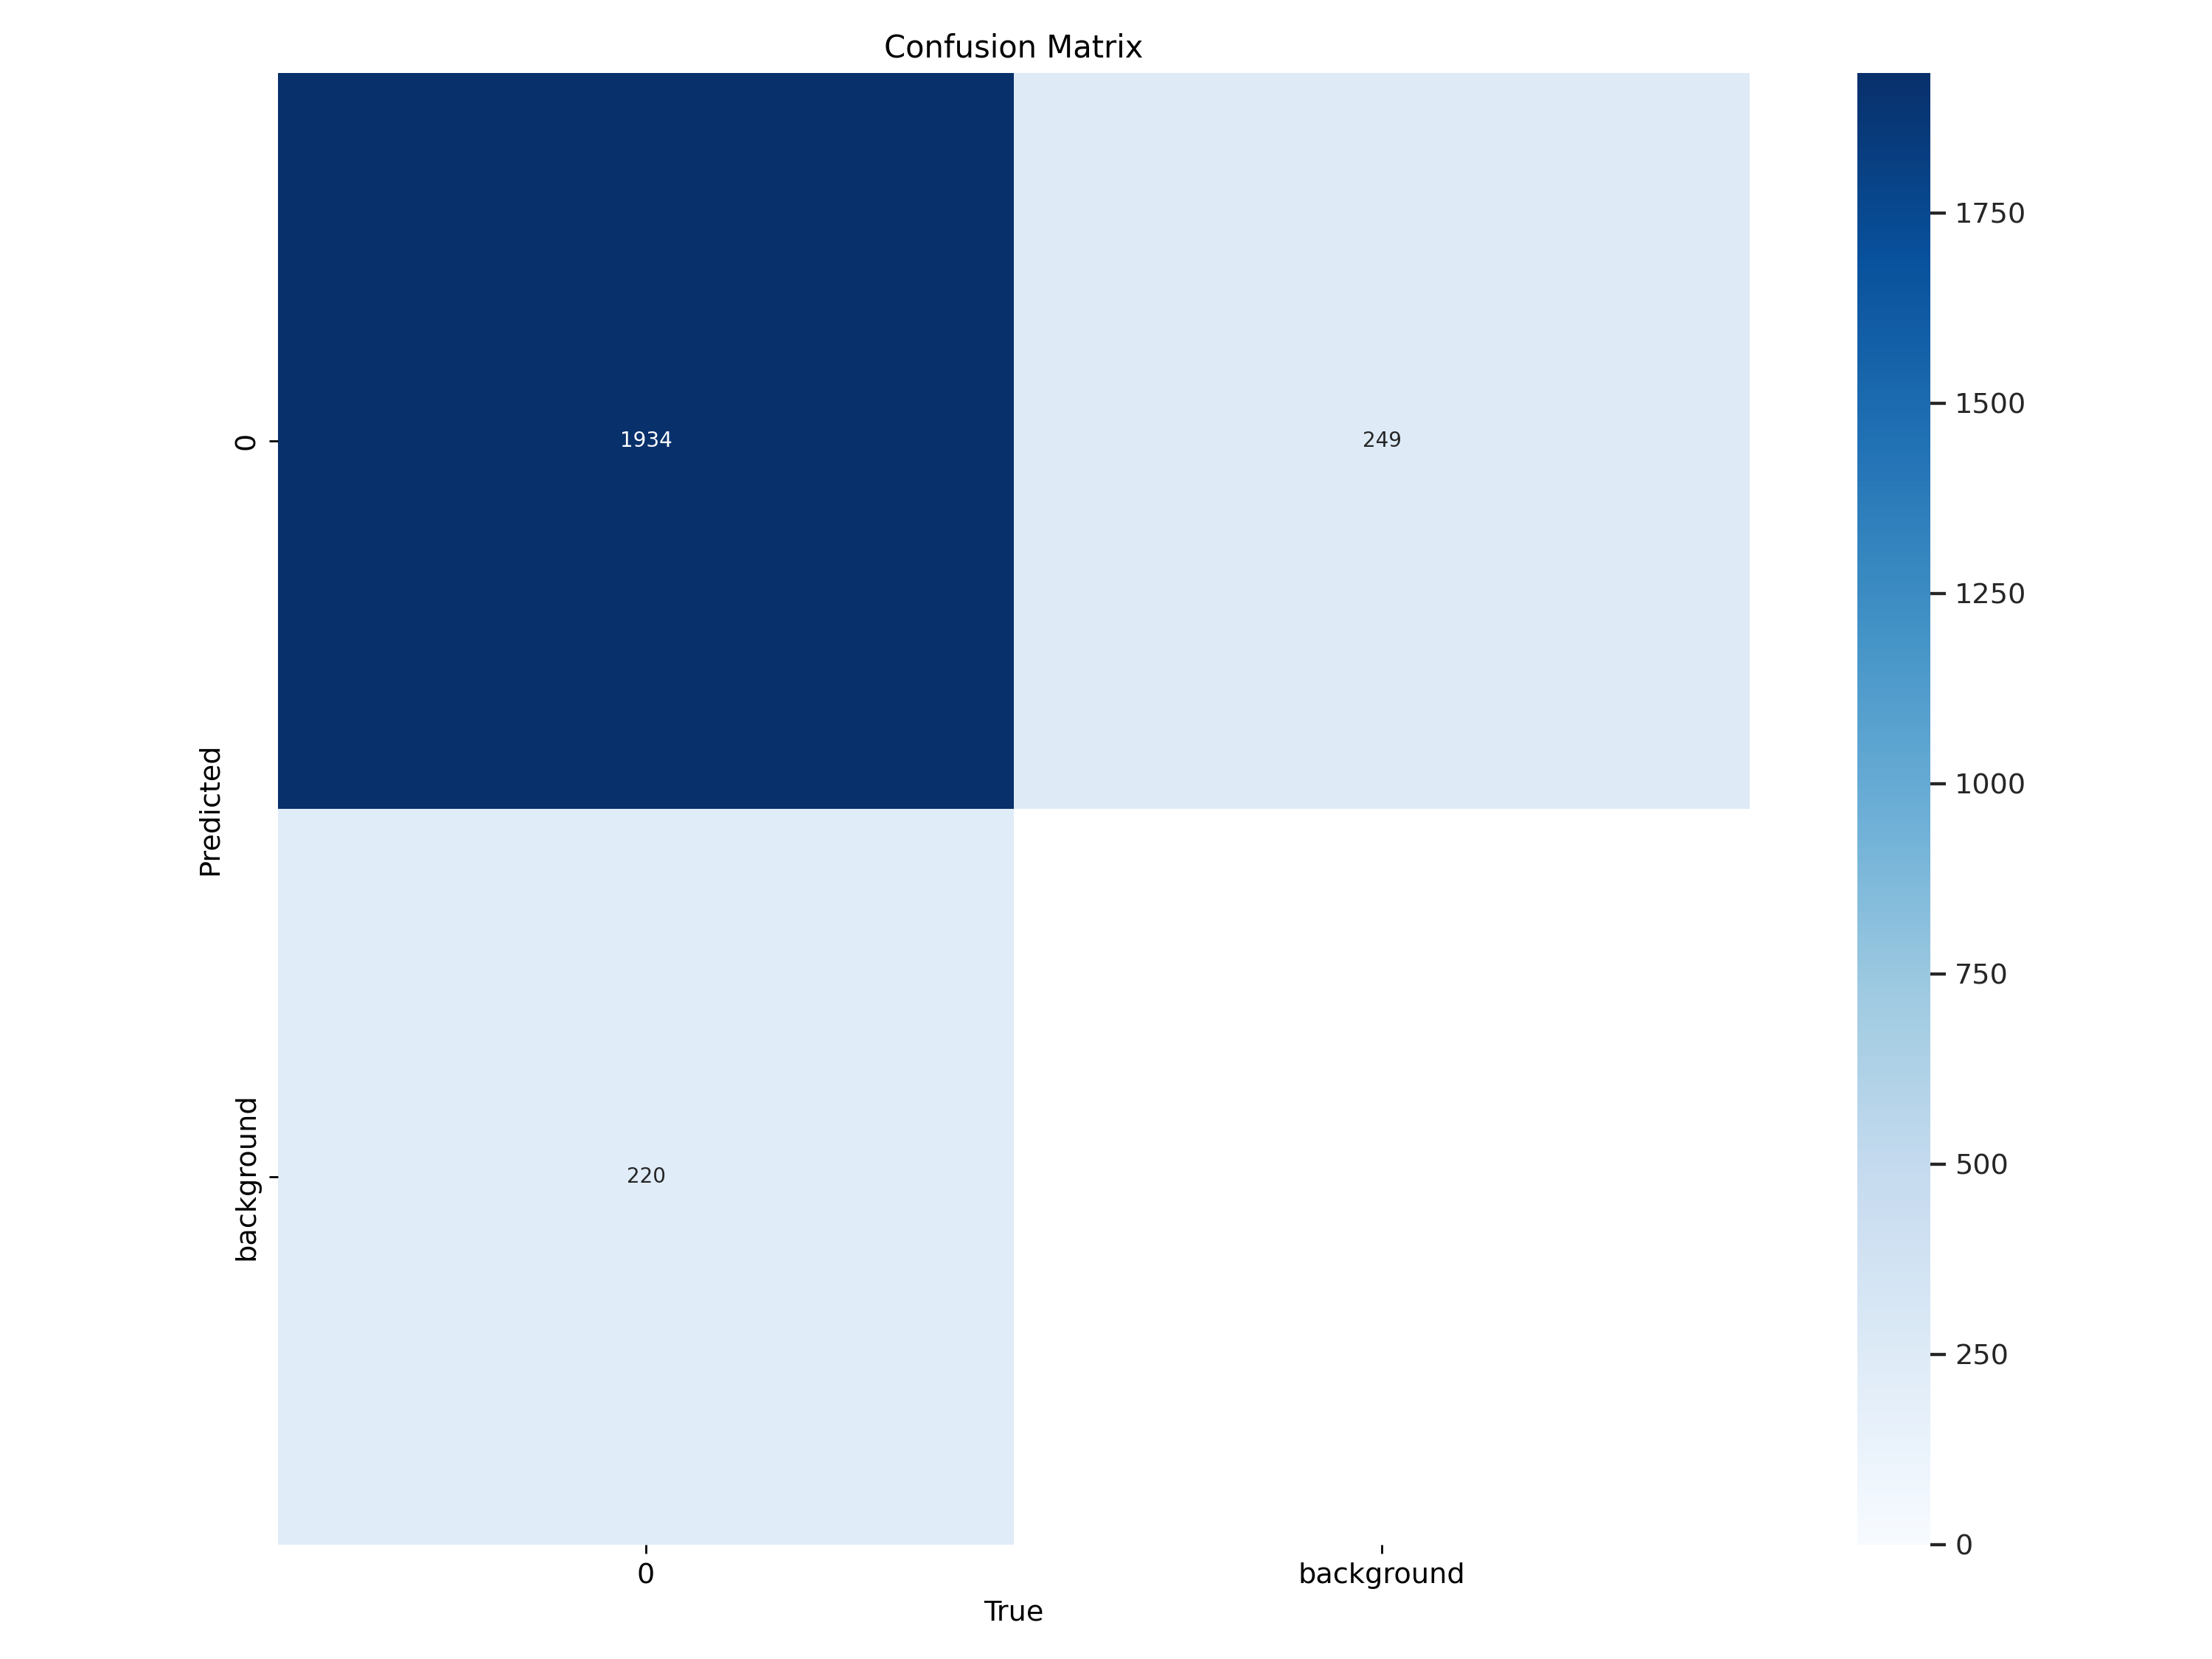

In [13]:
from IPython.display import Image as IPyImage
IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

# train result

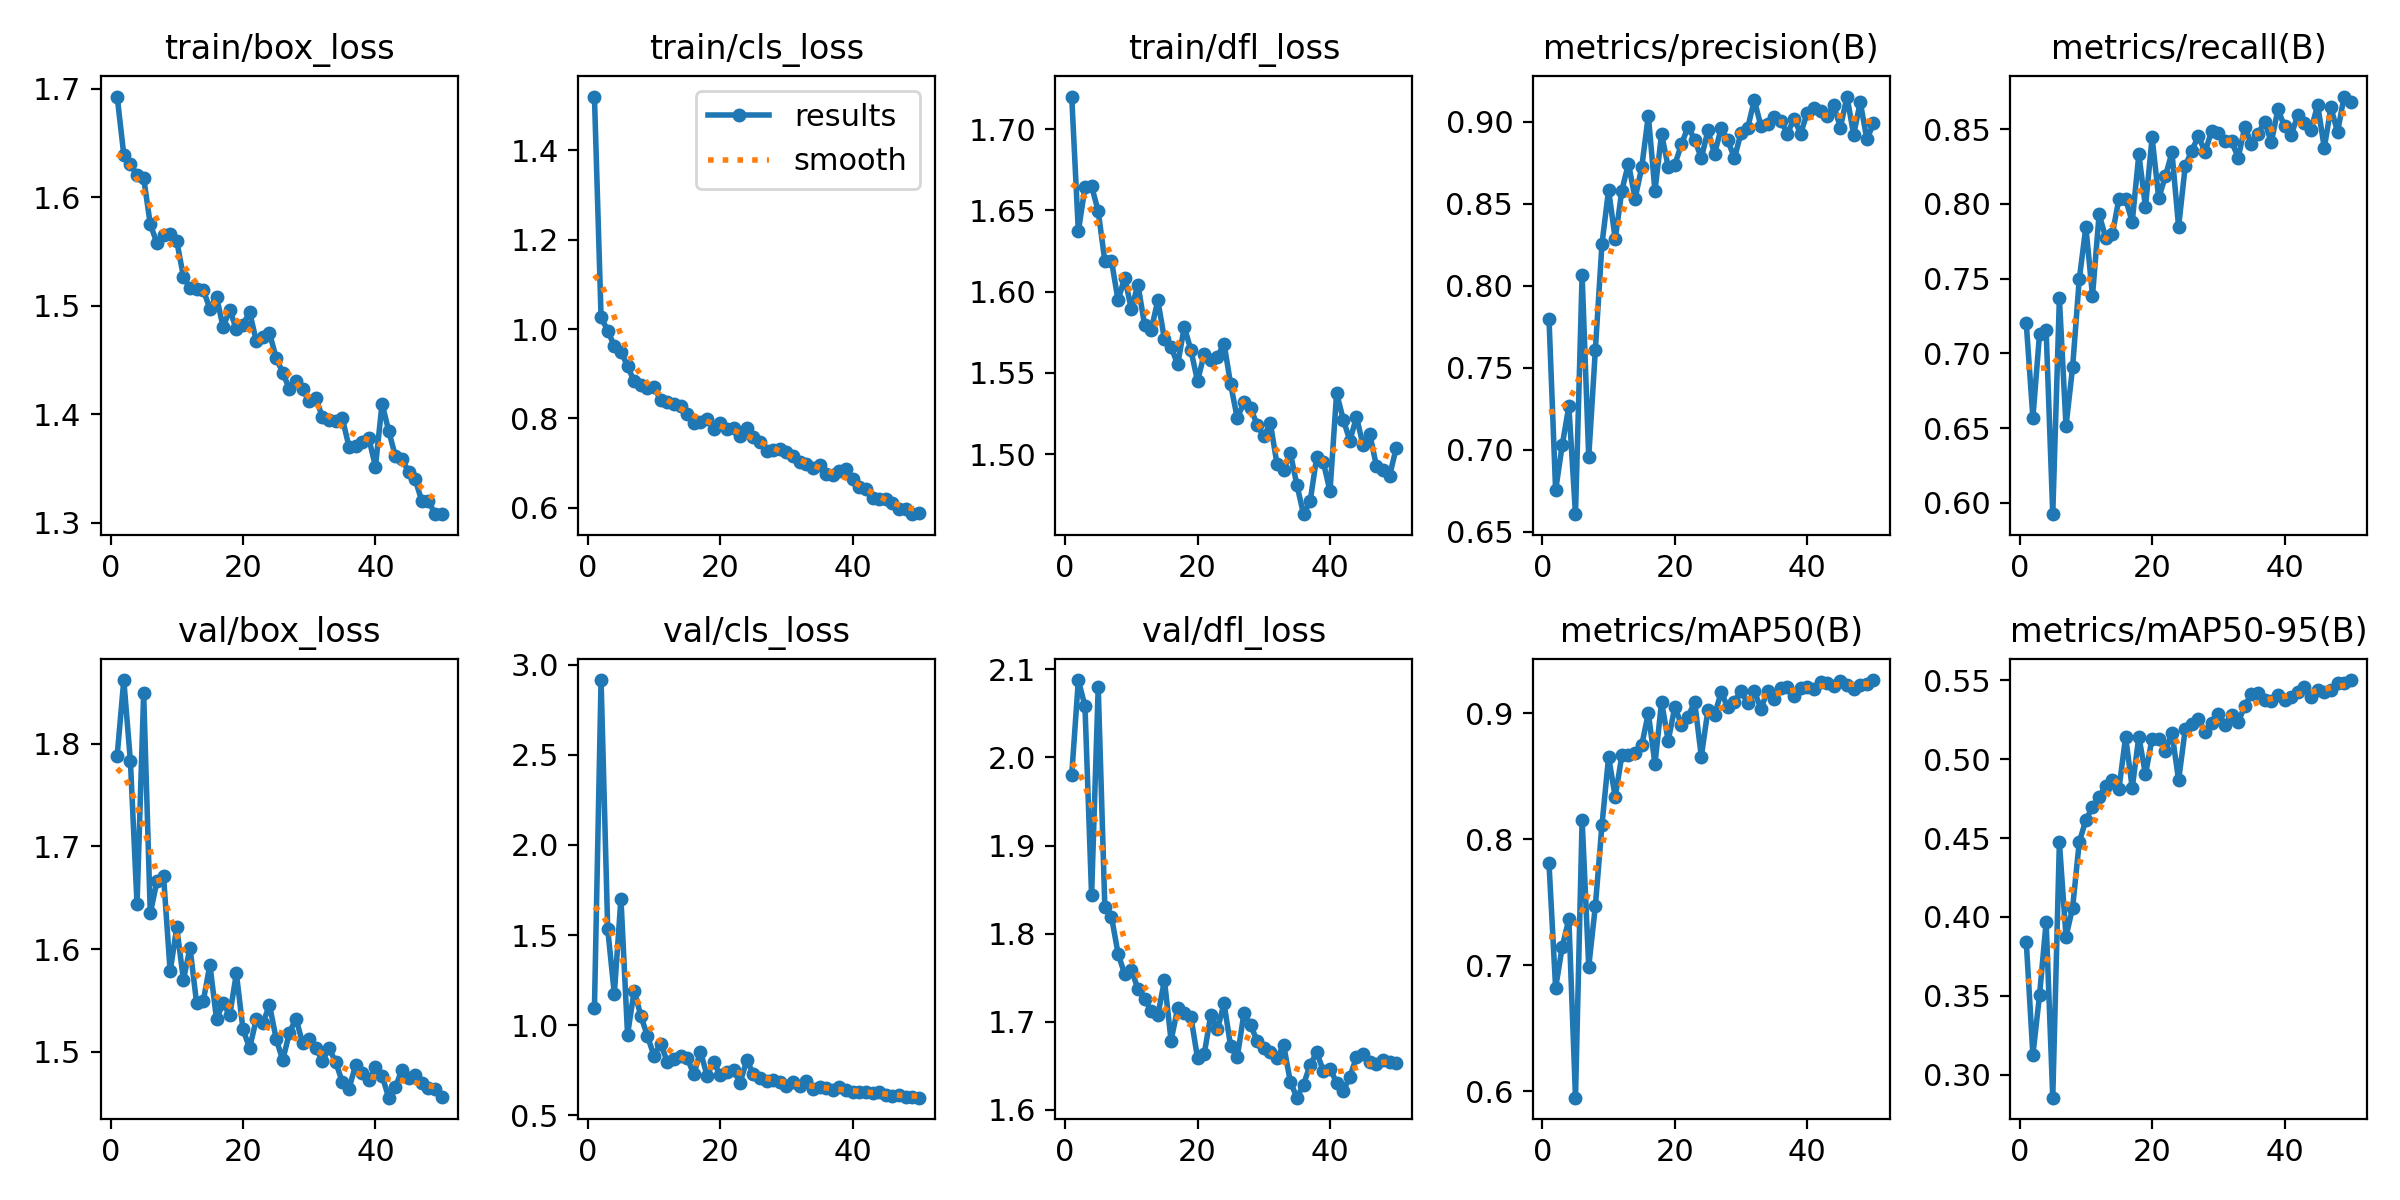

In [14]:
IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=800)

# precision recall curve

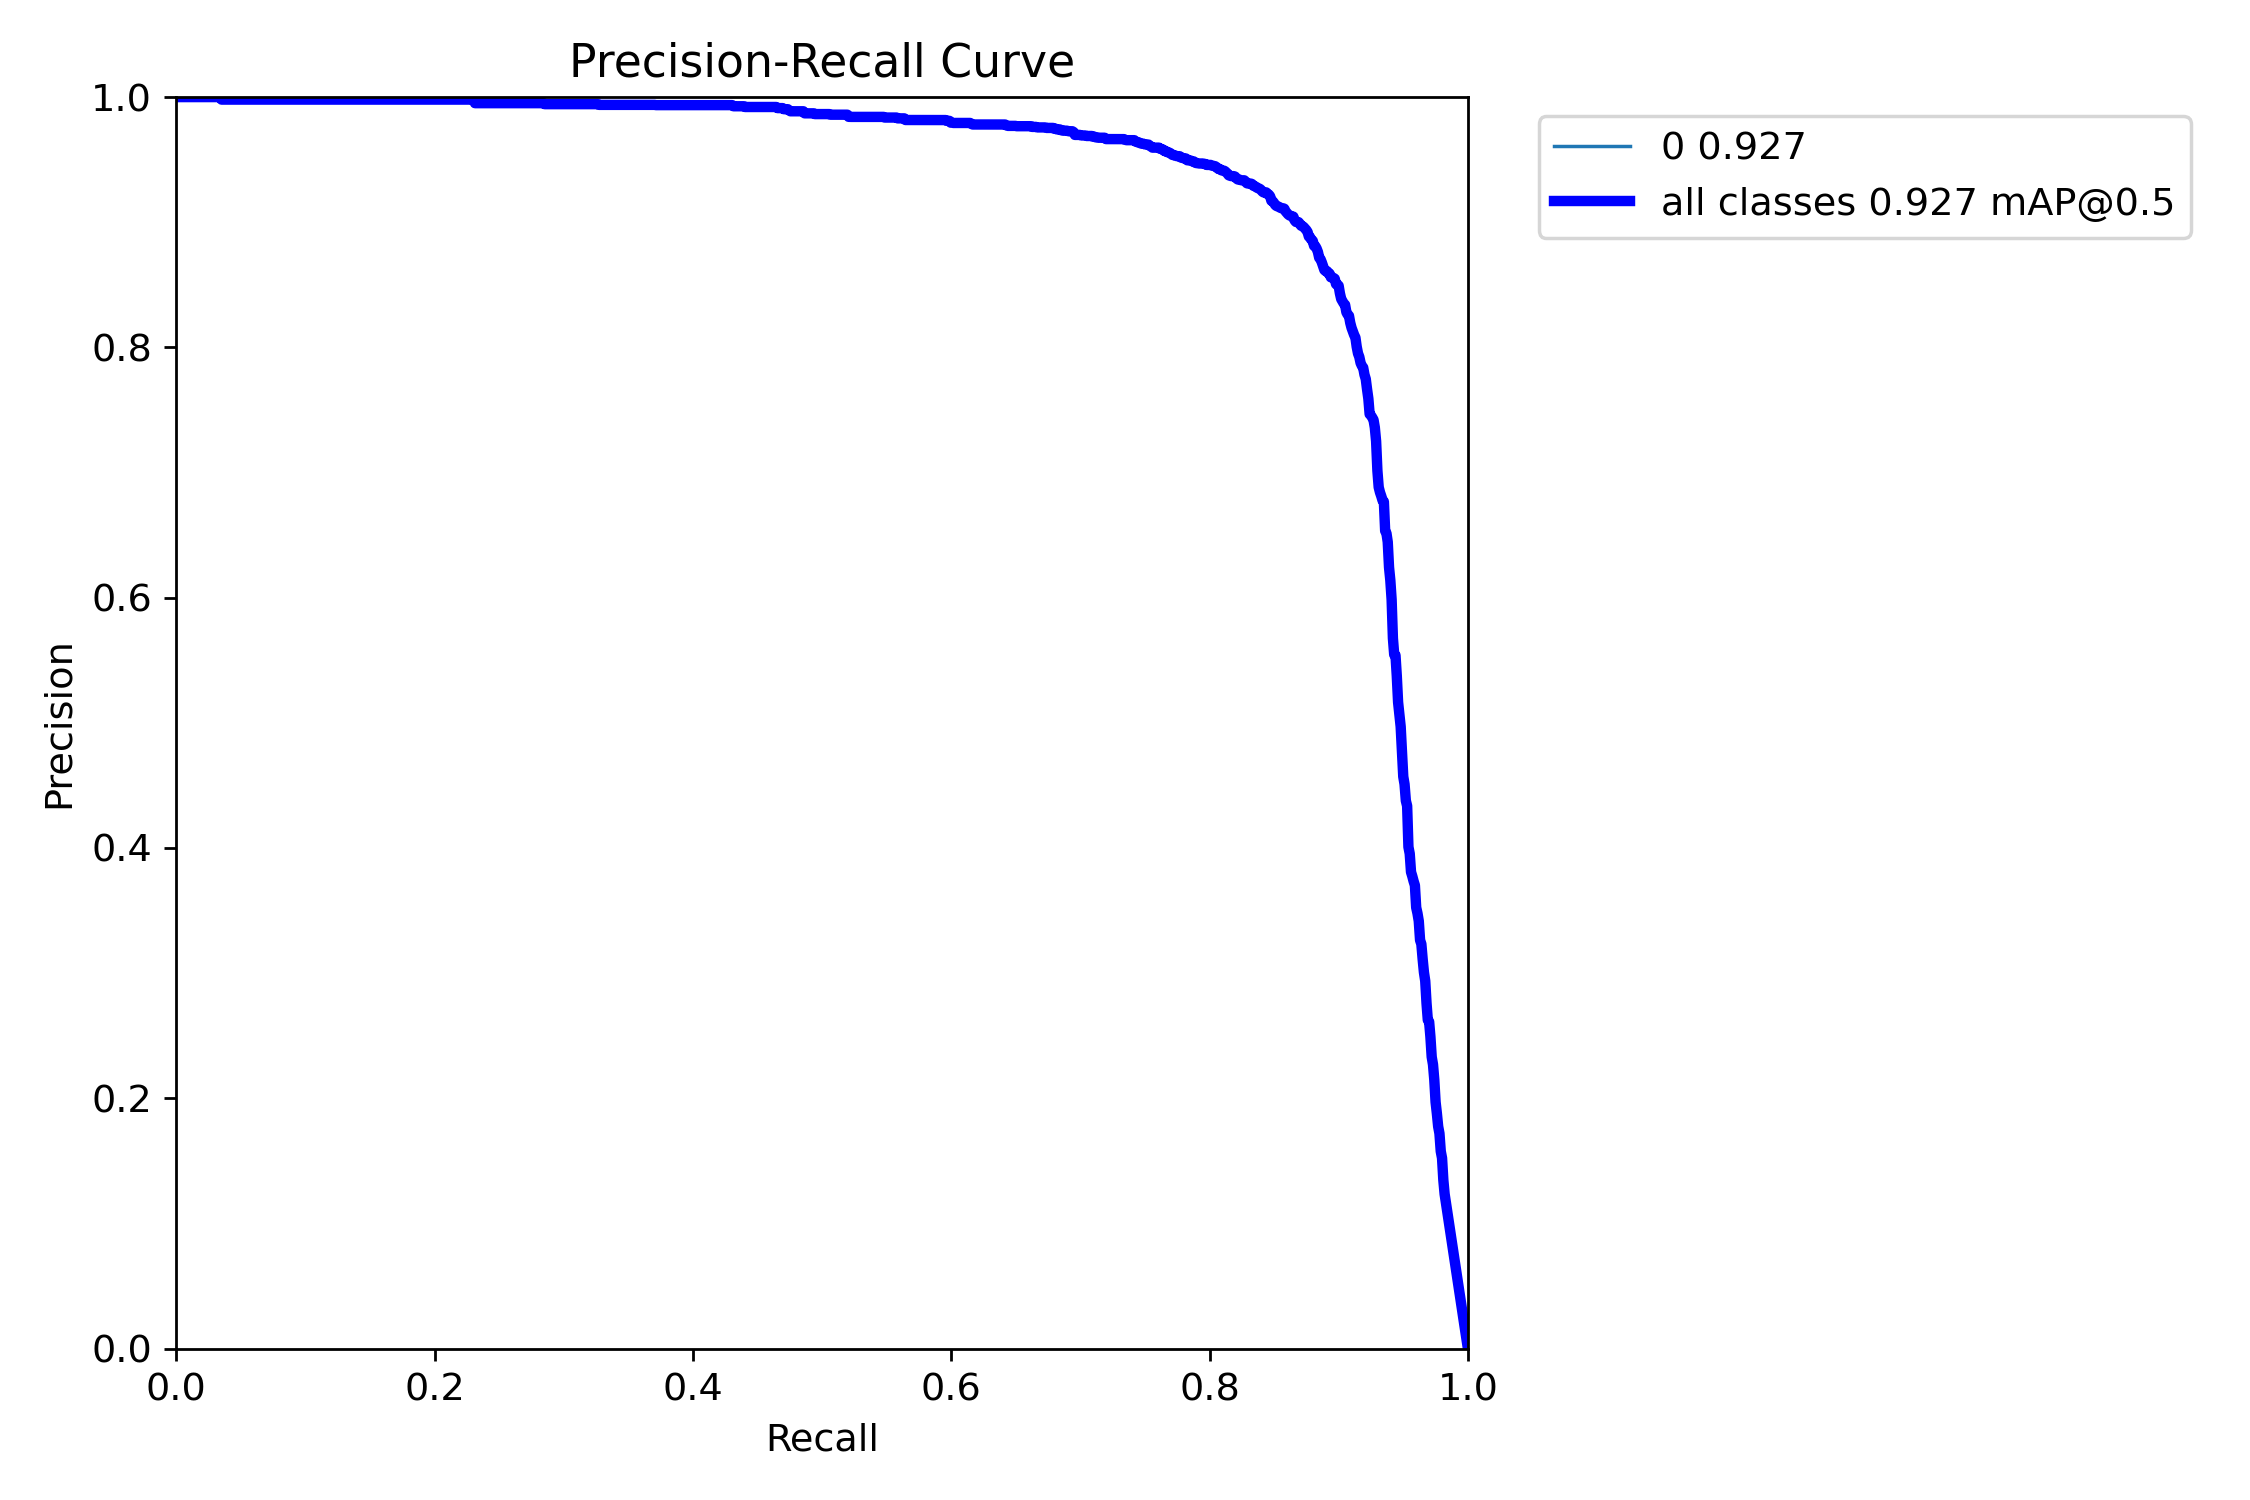

In [15]:
IPyImage(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=800)

# preview of the trained result

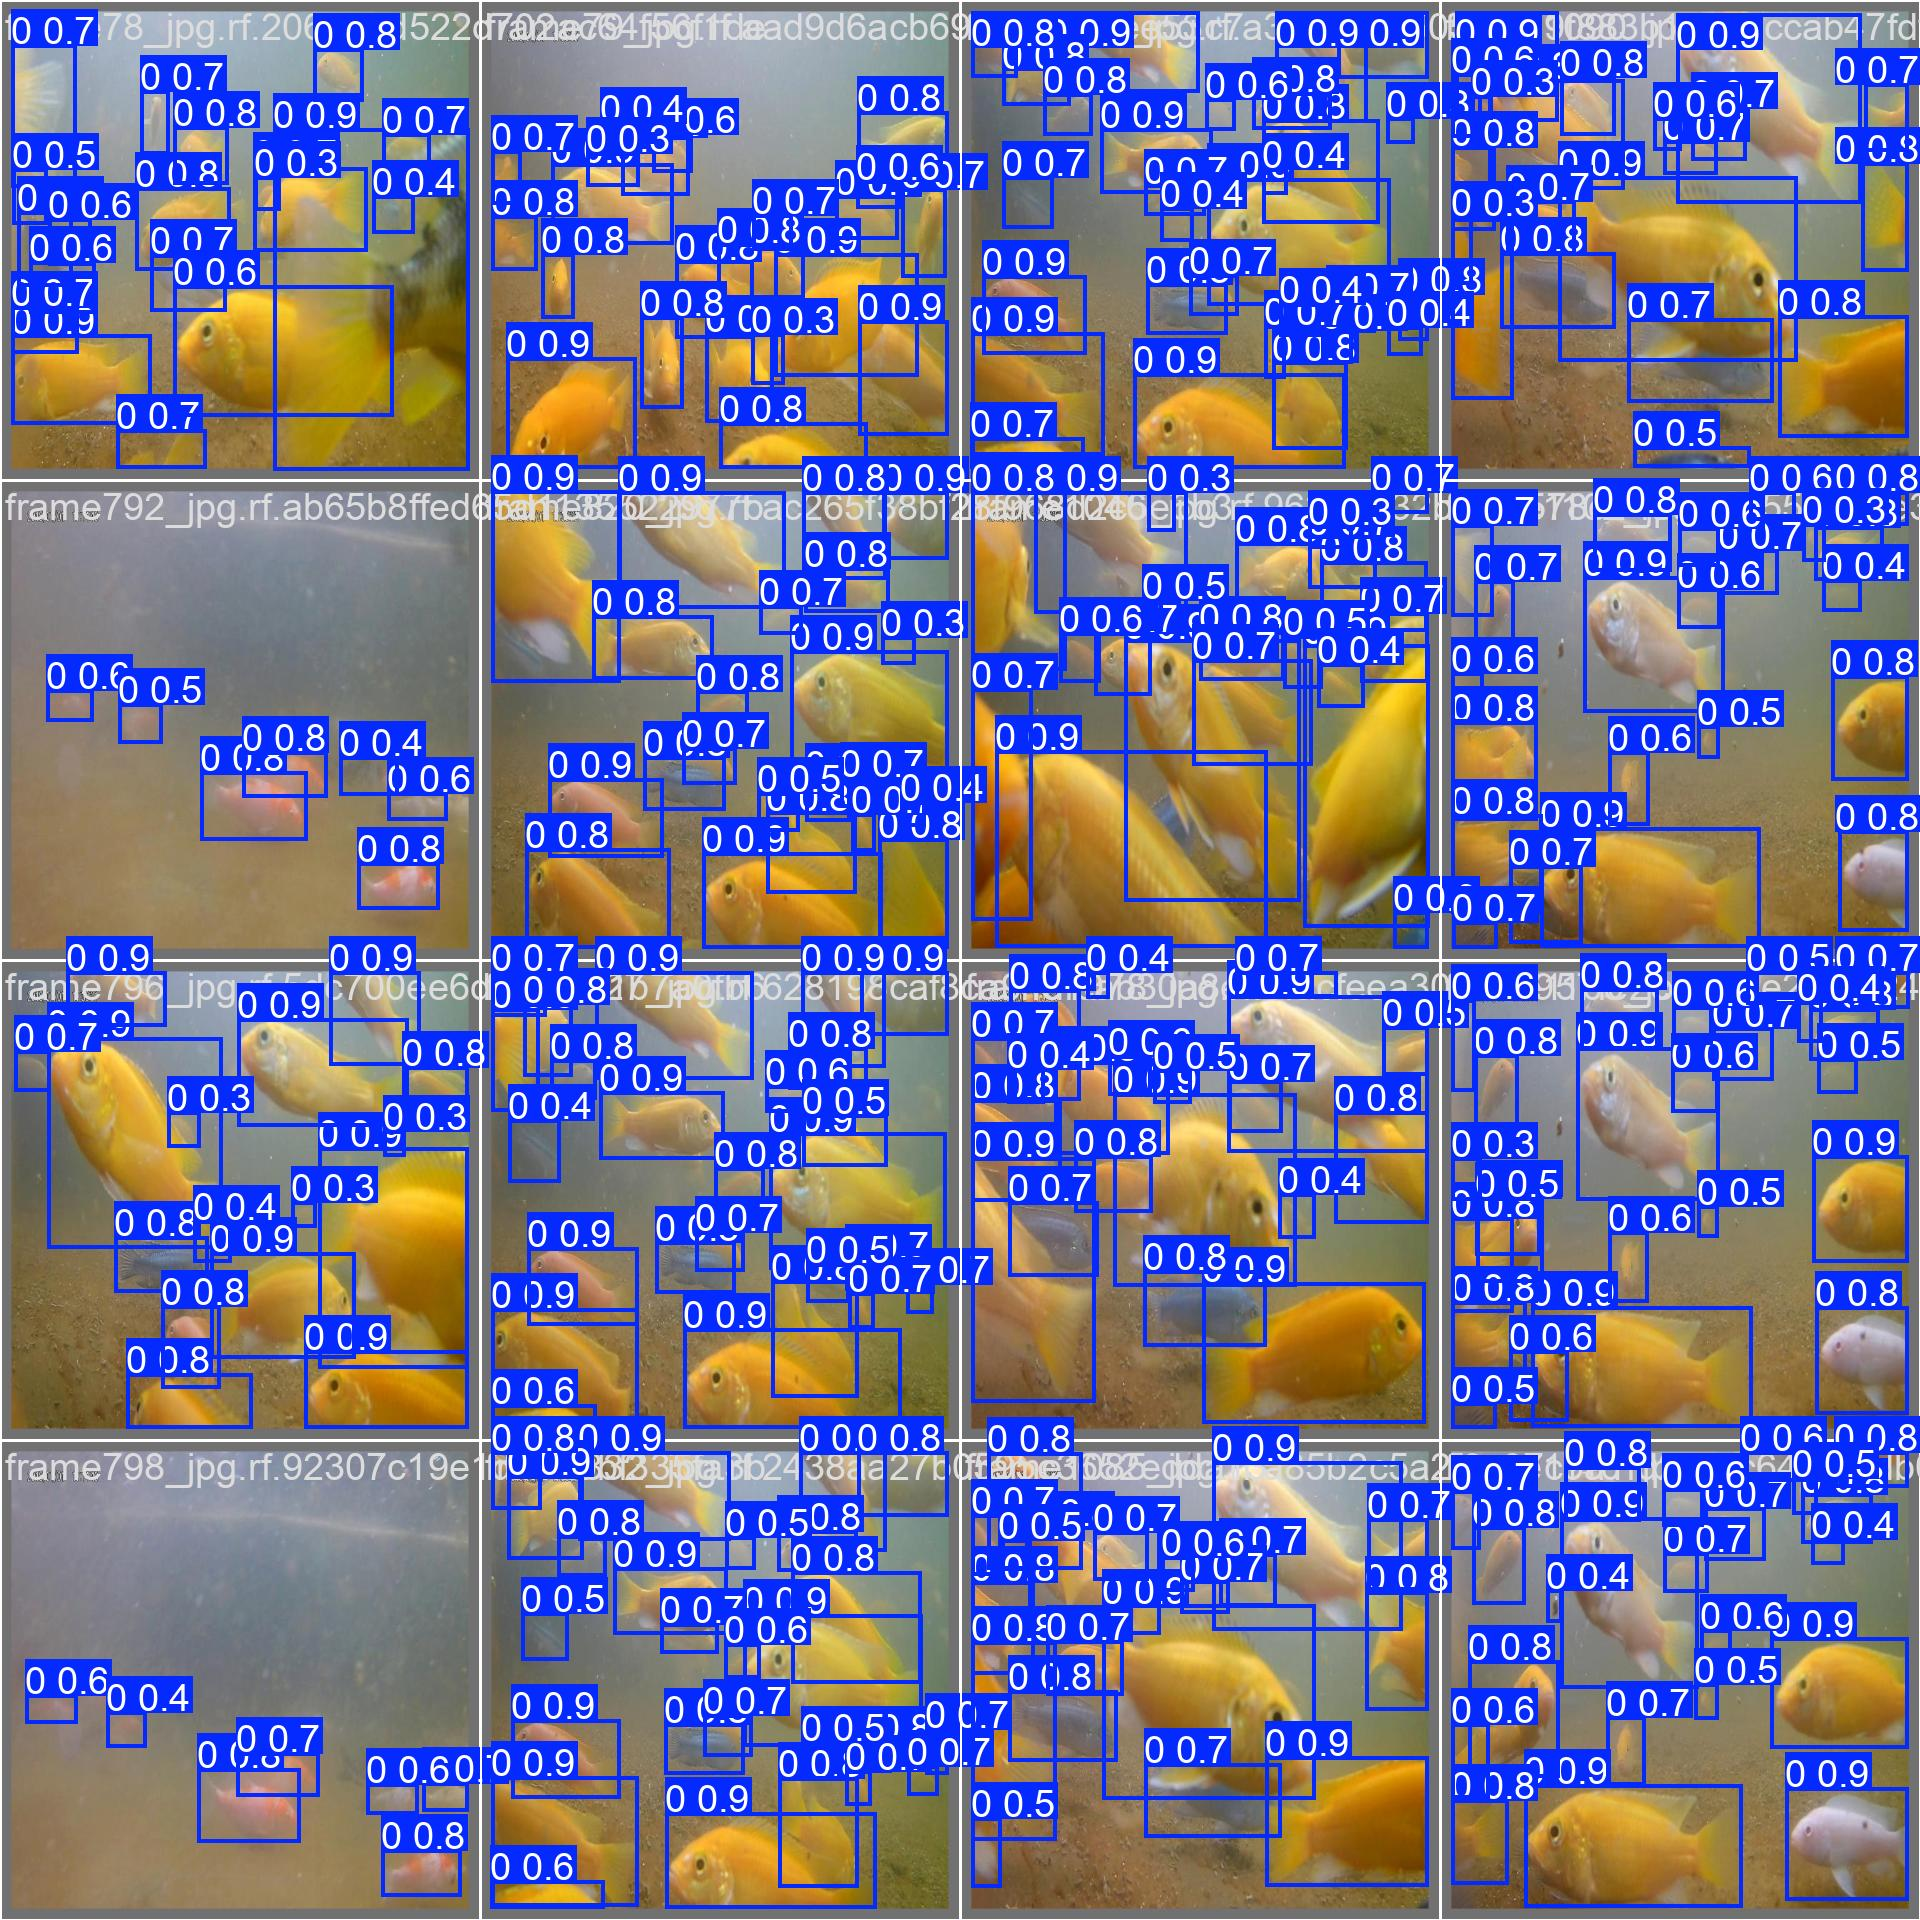

In [16]:
IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=800)

# validating custom model

## Precision: 0.899
## Recall: 0.869
## mAP50: 0.927

In [17]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 486 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
val: Scanning /kaggle/working/fist-detection-2/valid/labels.cache... 118 images,
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        118       2154      0.899      0.869      0.927      0.549
Speed: 2.8ms preprocess, 23.1ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# inference with custom model

In [18]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 486 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs

image 1/59 /kaggle/working/fist-detection-2/test/images/frame1008_jpg.rf.89584041e2d159612020a4759a75ba4f.jpg: 640x640 22 0s, 21.7ms
image 2/59 /kaggle/working/fist-detection-2/test/images/frame1126_jpg.rf.61b30567dbeba57bd66b5922fe7e771c.jpg: 640x640 17 0s, 20.1ms
image 3/59 /kaggle/working/fist-detection-2/test/images/frame1133_jpg.rf.a899e6a3e8e47bfea880d8f07f9640fd.jpg: 640x640 23 0s, 20.1ms
image 4/59 /kaggle/working/fist-detection-2/test/images/frame1188_jpg.rf.049e049bfb21f863d40c1f9e22e020ed.jpg: 640x640 18 0s, 20.1ms
image 5/59 /kaggle/working/fist-detection-2/test/images/frame1239_jpg.rf.db34022a97b8e1e65d1fe316f59de16b.jpg: 640x640 17 0s, 20.0ms
image 6/59 /kaggle/working/fist-detection-2/test/images/frame1241_jpg.rf.5bda4837b7bc5c3ff902876d1c01eeb2.jpg: 640x640 17 0s, 20.0ms
image 7/59 /kaggle/

# inference result preview

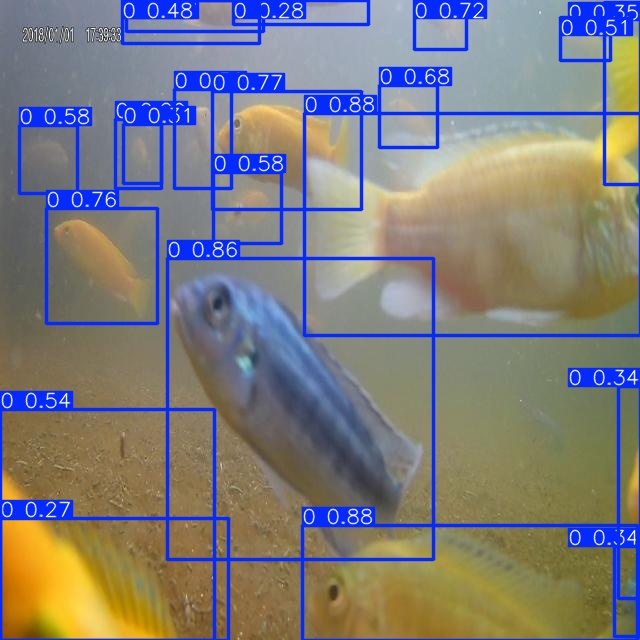

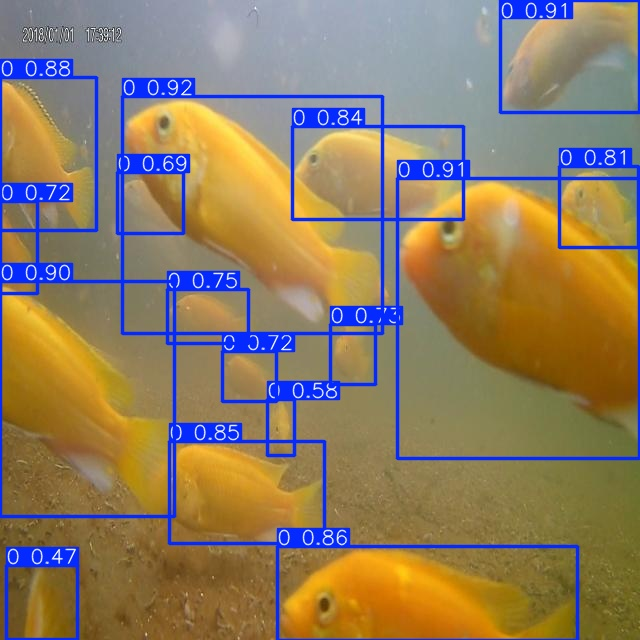

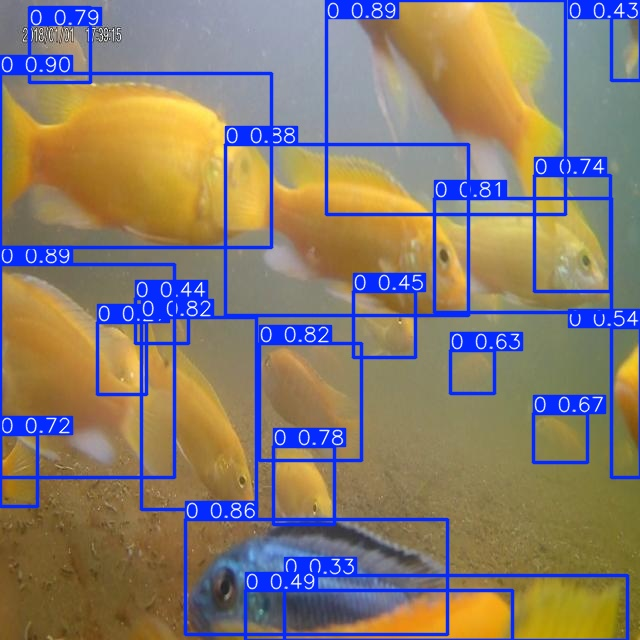

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# deploying model on roboflow

In [22]:
HOME

'/kaggle/working'

In [21]:
project.version(dataset.version).deploy(model_type="yolov9", model_path=f"{HOME}/runs/detect/train")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/runs/detect/train/opt.yaml'

# downloading YOLOv8 CAM

In [23]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git

Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 82 (delta 9), reused 14 (delta 5), pack-reused 57 (from 1)
Receiving objects: 100% (82/82), 29.78 MiB | 44.58 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [24]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [25]:
%cd /kaggle/working/YOLO-V8-CAM

/kaggle/working/YOLO-V8-CAM


In [26]:
!pip install ttach

In [28]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [36]:
img = cv2.imread('/kaggle/working/fist-detection-2/test/images/frame216_jpg.rf.61f4d0e2914bfe4c621ccd91db2c8192.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [37]:
import ultralytics
from ultralytics import YOLO
model = YOLO('/kaggle/working/yolo11n.pt') 
model.cpu()

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

# applying XAI

In [38]:
target_layers =[model.model.model[-2]]

In [39]:
cam = EigenCAM(model, target_layers,task='od')


0: 640x640 1 banana, 1 apple, 169.7ms
Speed: 2.6ms preprocess, 169.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


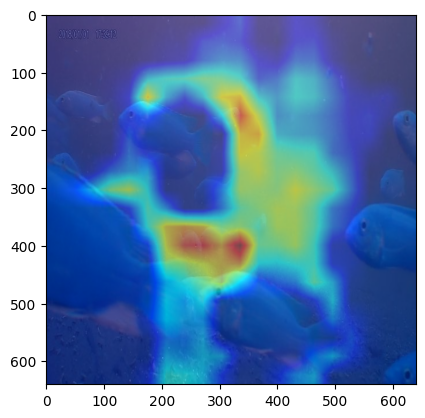

In [40]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 1 banana, 1 apple, 167.4ms
Speed: 6.3ms preprocess, 167.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


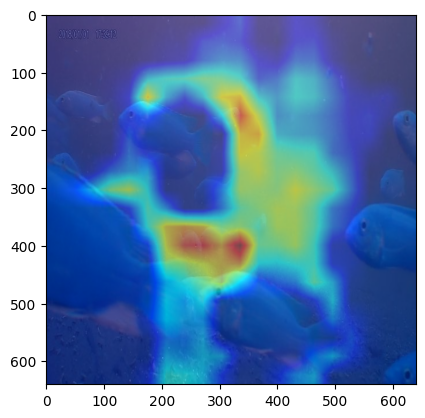

In [41]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

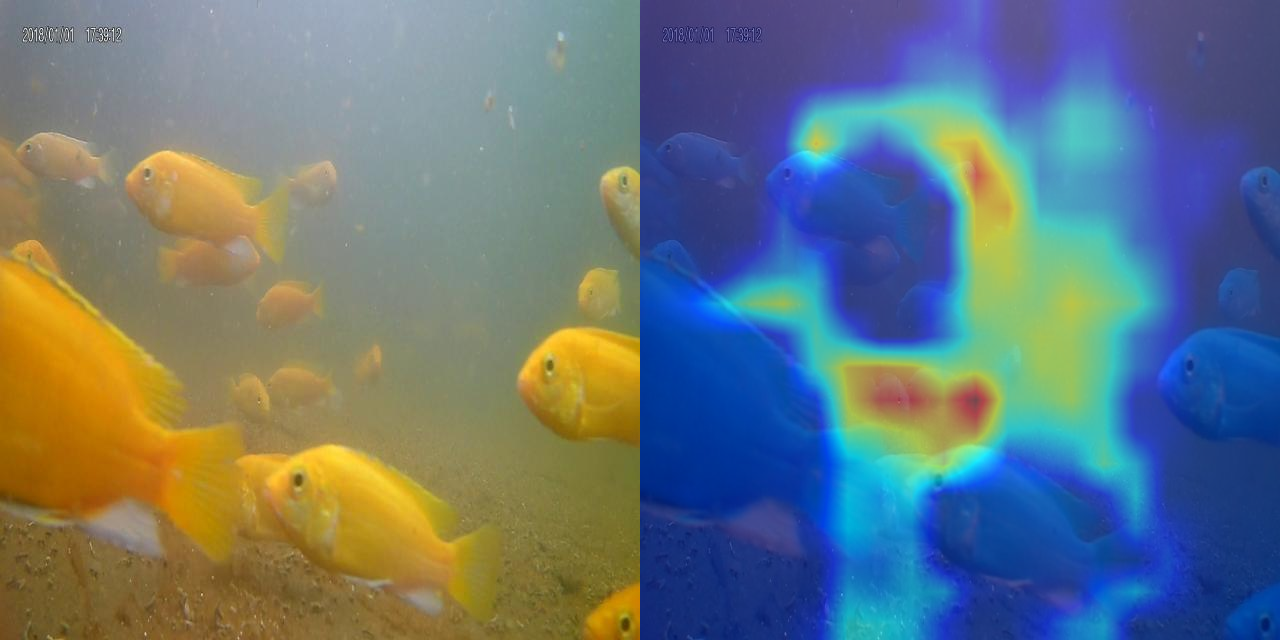

In [42]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))